<center><h1><b><font size="6">Sequence mining | hidden Markov model</font></b></h1></center>

In [2]:
import pylab
import numpy as np
import pandas as pd

from hmmlearn.hmm import GaussianHMM

%matplotlib inline 

## Read the data 

In [3]:
df = pd.read_csv("./data/speed.csv")
df

,rt,corr,Pacc,prev
0,6.456770,cor,0.000000,inc
1,5.602119,cor,0.000000,cor
2,6.253829,inc,0.000000,cor
3,5.451038,inc,0.000000,inc
4,5.872118,inc,0.000000,inc
...,...,...,...,...
434,5.438079,cor,0.272727,cor
435,6.030685,cor,0.227273,cor
436,5.420535,cor,0.181818,cor
437,5.564520,inc,0.136364,cor


In [4]:
x = df.drop(["corr"], axis = 1) #deleta the column corr
x["prev"] = pd.factorize(x["prev"])[0] #convert to numeric 

In [6]:
x

,rt,Pacc,prev
0,6.456770,0.000000,0
1,5.602119,0.000000,1
2,6.253829,0.000000,1
3,5.451038,0.000000,0
4,5.872118,0.000000,0
...,...,...,...
434,5.438079,0.272727,1
435,6.030685,0.227273,1
436,5.420535,0.181818,1
437,5.564520,0.136364,1


## Create HMM Model

In [7]:
model1 = GaussianHMM(n_components =2, n_iter=10000, random_state=1).fit(x)
model1.monitor_

ConvergenceMonitor(
    history=[-610.671356680971, -192.69473255308242, 867.4231920487744, 1094.7784258657666, 1327.4705602064803, 1327.4705602064794],
    iter=6,
    n_iter=10000,
    tol=0.01,
    verbose=False,
)

## Make Prediction

In [9]:
states = model1.predict(x)
pd.Series(states).value_counts()

0    325
1    114
Name: count, dtype: int64

## Mean reaction time 

In [10]:
model1.means_[:, 0]

array([6.10436614, 5.80453288])

## Plot

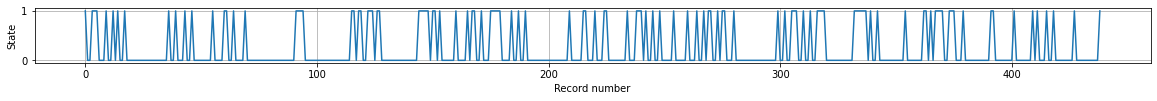

In [11]:
fig = pylab.figure(figsize=(20, 1))
ax = fig.add_subplot(111)
ax.grid(True)
ax.set_xlabel("Record number")
ax.set_ylabel("State")
ax.plot(states)